<h1> Analyse van de legers wereldwijd 

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

We kijken naar onze data

In [2]:
data = pd.read_csv("./data/global firepower 2022 wide.csv")
data.head()

,Country,country_code,Active Personnel,Aircraft Carriers,Armored Vehicles,Attack Helicopters,Available Manpower,Coastline Coverage,Corvettes,Dedicated Attack,...,Square Land Area,Submarines,Tanker Fleet,Tanks,Total Aircraft Strength,Total Population,Towed Artillery,Trainers,Transports,Waterways (usable)
0,Afghanistan,AFG,0,0,530,0,14611901,0,0,0,...,652230,0,0,0,0,37466414,60,0,0,1200
1,Albania,ALB,8000,0,76,0,1513309,362,0,0,...,28748,0,0,0,19,3088385,0,0,0,41
2,Algeria,ALG,130000,0,6461,45,20916812,998,6,22,...,2381741,6,5,2196,552,43576691,450,87,58,0
3,Angola,ANG,107000,0,1210,15,6728529,1600,0,18,...,1246700,0,0,320,299,33642646,585,61,30,1300
4,Argentina,ARG,83000,0,800,0,20180574,4989,9,6,...,2780400,2,2,349,218,45864941,172,70,22,11000


We vergelijken de actieve militairen met de totale bevolking
Hier zien we dat ten opzichte van de totale bevolking Noord Korea de meeste actieve soldaten heeft

In [3]:
data["Percentage Military"] = round(data["Active Personnel"] / data["Total Population"], 3)
data.sort_values(by="Percentage Military", ascending=False).head()

,Country,country_code,Active Personnel,Aircraft Carriers,Armored Vehicles,Attack Helicopters,Available Manpower,Coastline Coverage,Corvettes,Dedicated Attack,...,Submarines,Tanker Fleet,Tanks,Total Aircraft Strength,Total Population,Towed Artillery,Trainers,Transports,Waterways (usable),Percentage Military
89,North Korea,NKO,1200000,0,4114,20,9299290,2495,0,114,...,35,0,5895,946,25831360,250,169,1,2250,0.046
37,Eritrea,ERI,175000,0,200,6,2151589,2234,0,0,...,0,0,300,33,6147398,30,7,5,0,0.028
55,Israel,ISR,173000,0,8044,48,3690559,273,7,27,...,5,11,1900,597,8787045,300,153,15,0,0.020
113,South Sudan,SSU,175000,0,150,6,5492037,0,0,0,...,0,0,55,18,10984074,0,0,2,0,0.016
5,Armenia,ARM,45000,0,673,20,1686501,0,0,10,...,0,0,288,64,3011609,145,10,2,0,0.015


We gaan een kleine dataset toevoegen om een geografische ligging van het land in rekening te kunnen nemen.

We moeten deze dataset wel eerst een beetje opkuisen. bv: We hebben alleen de landen nodig geen overzeese gebieden. <br> We verwijderen ook de country code omdat deze dataset de niet de globale notatie word gebruikt. (de code is vertaald in eigen taal bv: Duitstland krijgt DEU van Deutschland ipv GER van Germany)


In [4]:
world_geolocation = pd.read_csv("./data/world-administrative-boundaries.csv")
world_geolocation = world_geolocation.drop(columns=["Country Code"])
print(world_geolocation.shape)
world_geolocation_filtered = world_geolocation[world_geolocation["Status"] == "Member State"]
print(world_geolocation_filtered.shape)


(255, 4)
(193, 4)


We hernoemen de kolom English name naar Country anders kunnen we de 2 datasets niet samenvoegen op Country.

In [5]:
world_geolocation_filtered = world_geolocation_filtered.rename(columns={'English Name': 'Country'})

Nu voegen we de beide datasets samen op basis van de internationale landnaam in het Engels.
<br> Dit gaat niet helemaal omdat sommige landen verschillende namen hebben. Er blijven 133 landen over dit is omdat de global firepower dataset niet alle landen heeft. (en er vallen er ook een paar weg)

In [6]:
try:
    result = pd.merge(data, world_geolocation_filtered, on='Country', how='inner')
except:
    print("Error merging on country code")

result = result.drop(columns=["Status"])
result.shape

(133, 51)

Een van de handigste statistieken is de correlatie zoeken tussen verschillende waarden dat kunnen we makkelijk doen met een correlatiematrix.

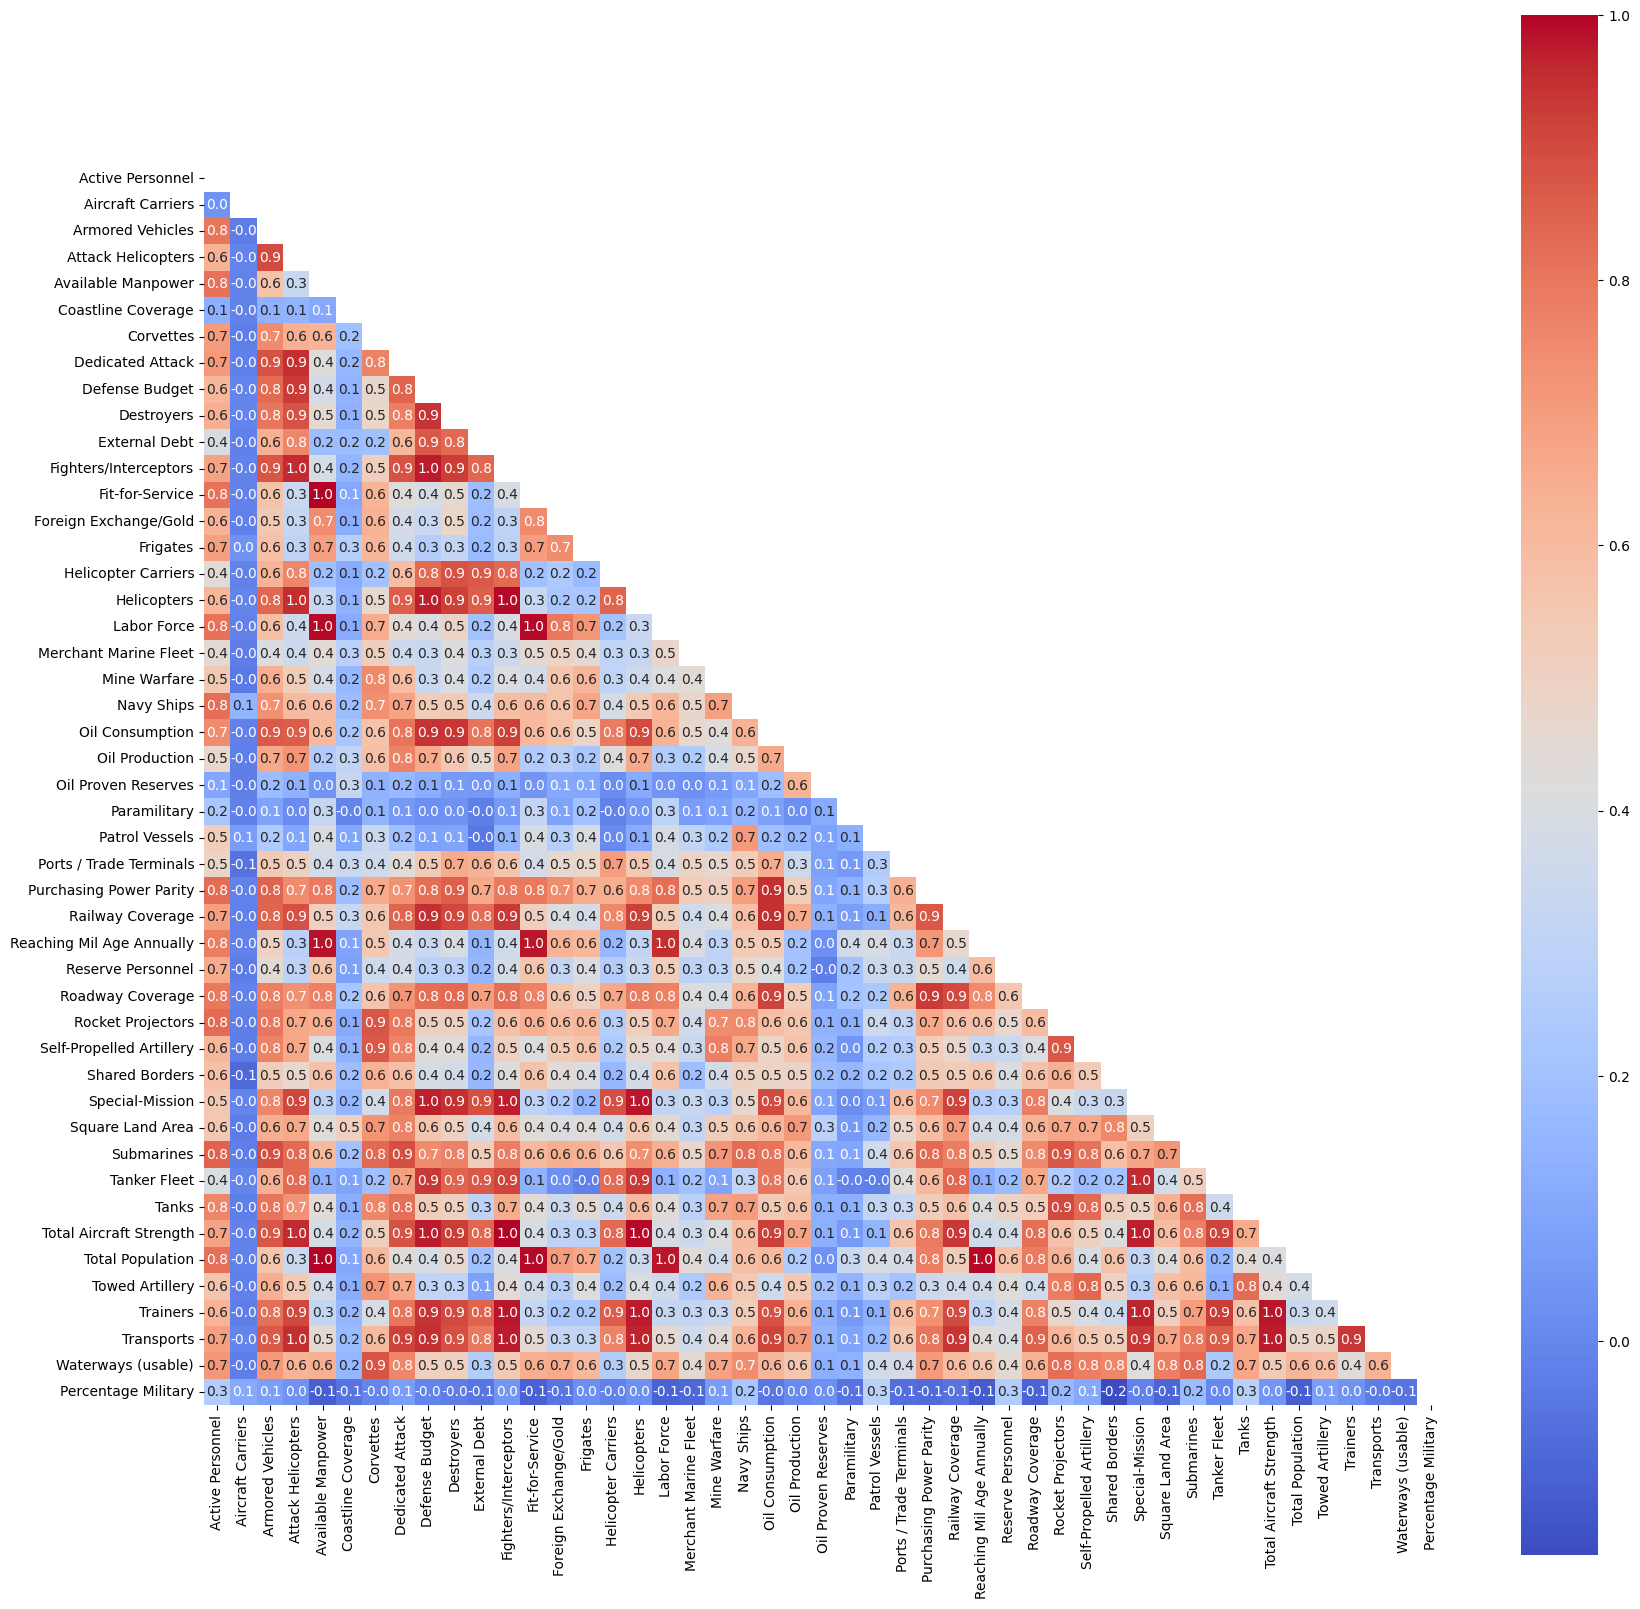

In [7]:
corr_matrix = result.select_dtypes(include="number").corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, square=True, ax=ax, fmt='.1f')
plt.show()

We gaan de correlatie tussen het budget en gevechtsvliegtuigen weergeven

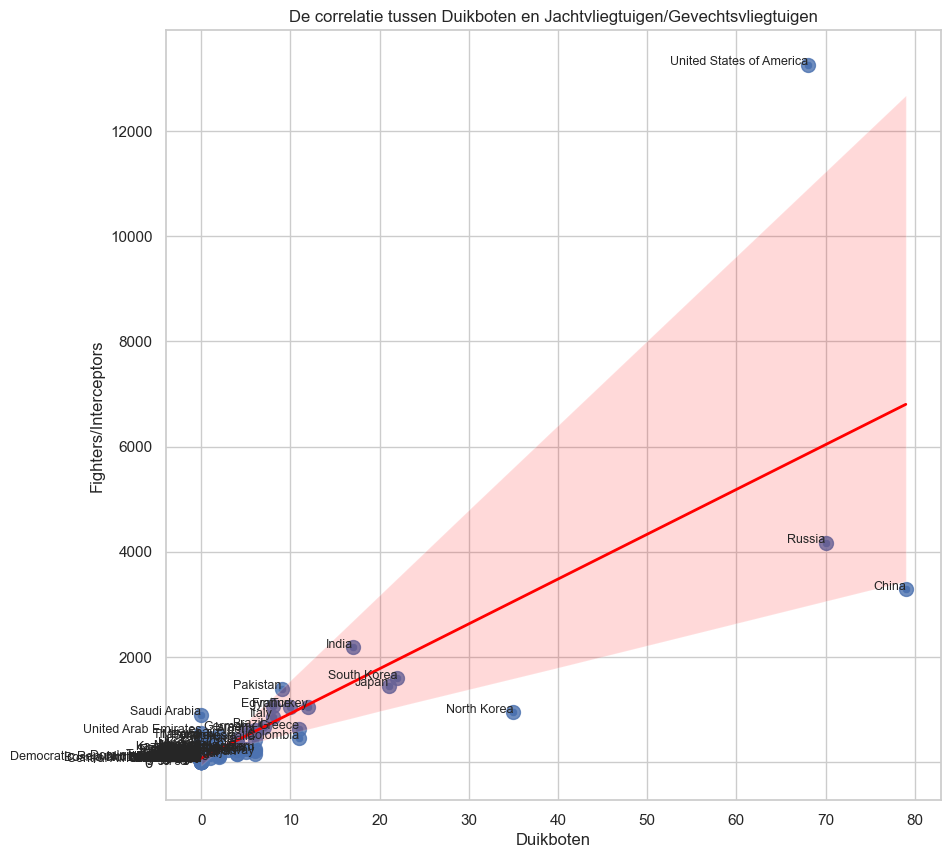

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Submarines', y='Fighters/Interceptors', data=result)
sns.regplot(x='Submarines', y='Fighters/Interceptors', data=result, scatter_kws={'s':100}, line_kws={'color': 'red', 'lw': 2})

plt.title('De correlatie tussen Duikboten en Jachtvliegtuigen/Gevechtsvliegtuigen')
plt.xlabel('Duikboten')
for i in range(len(result)):
    plt.text(result['Submarines'].iloc[i], 
             result['Fighters/Interceptors'].iloc[i], 
             result['Country'].iloc[i], 
             fontsize=9, 
             ha='right')
plt.show()


Hieruit blijkt dat de Verenigde Staten buitenproportioneel veel meer gevechtsvliegtuigen heeft dan duikboten, terwijl Noord-Korea juist het tegenovergestelde patroon vertoont.


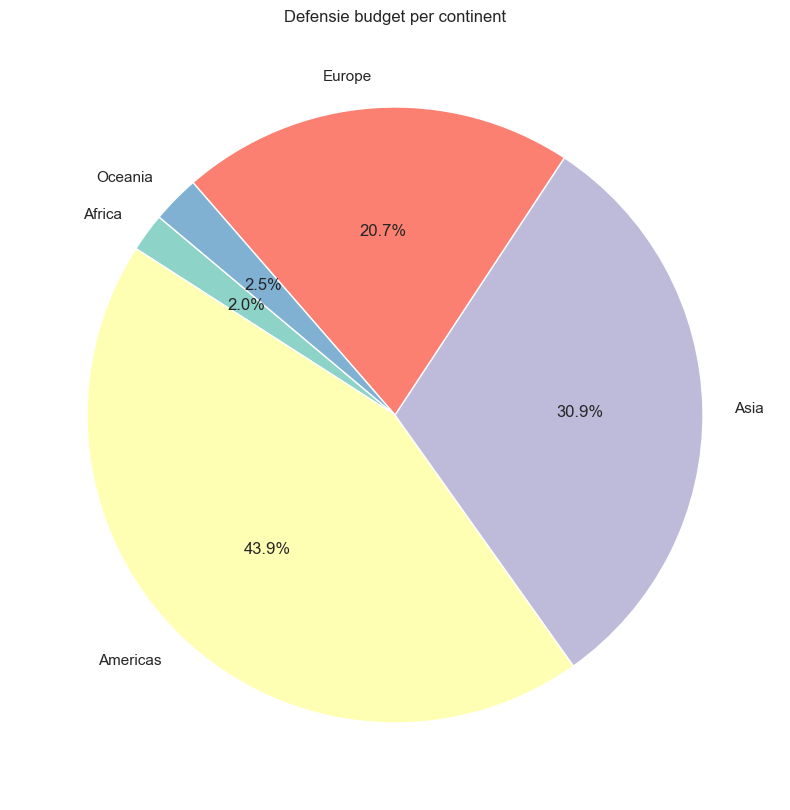

In [9]:
grouped_data = result.groupby('Continent of the territory')['Defense Budget'].sum()

plt.figure(figsize=(10, 10))
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(grouped_data)))

plt.title('Defensie budget per continent')

plt.show()

Hier zien we dat Noord-Amerika bijna de helft van de totale uitgaven aan het leger zijn.
<br> Verder valt op dat Afrika (met toch veel inwoners) bijna niets spendeerd aan het leger.

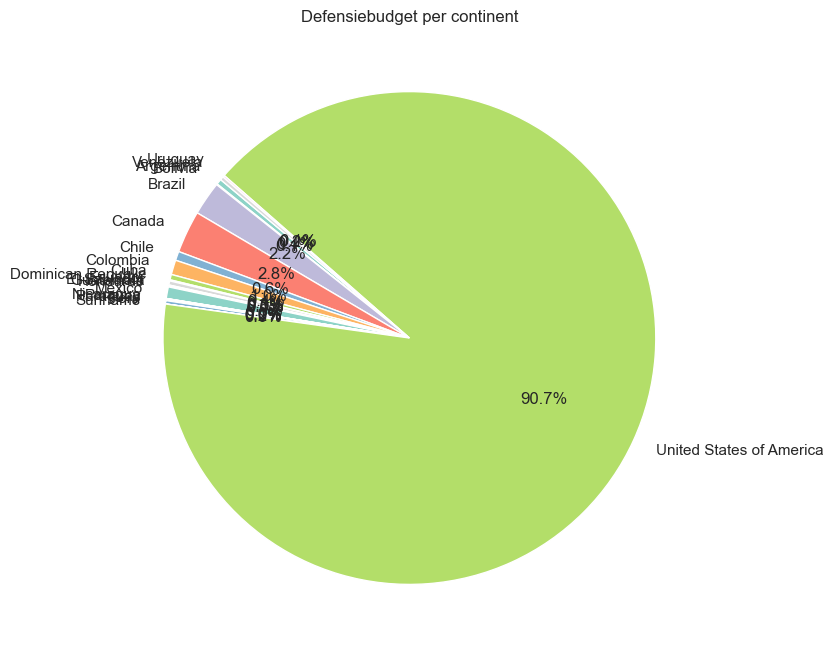

In [10]:
americas_data = result[result['Continent of the territory'] == 'Americas'] 
grouped_americas_data = americas_data.groupby('Country')['Defense Budget'].sum()

plt.figure(figsize=(8, 8))
plt.pie(grouped_americas_data, labels=grouped_americas_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(grouped_americas_data)))

plt.title('Defensiebudget per continent')

plt.show()

Maar dit is zoals je kunt zien niet alles de Verenigde Staten spenderen namelijk 90% van het defensiegeld in Noord en Zuid-Amerika. 

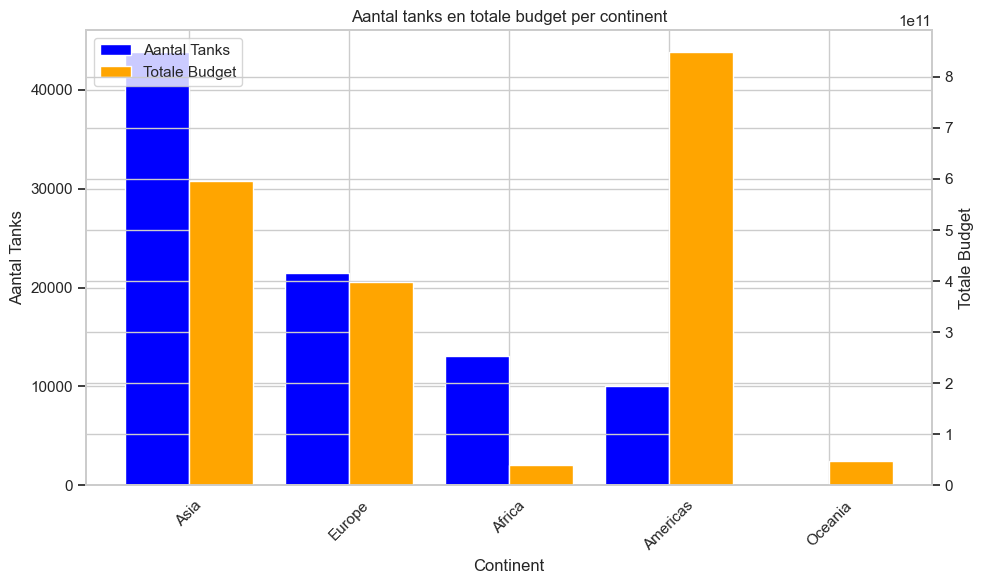

In [11]:
tank_per_land = result.groupby('Continent of the territory')['Tanks'].sum().sort_values(ascending=False)
budget_per_land = result.groupby('Continent of the territory')['Defense Budget'].sum().sort_values(ascending=False)

# Zorg ervoor dat de indices (continenten) hetzelfde zijn
indices = tank_per_land.index.intersection(budget_per_land.index)

bar_width = 0.4
index = np.arange(len(indices))
fig, ax1 = plt.subplots(figsize=(10, 6))

bar1 = ax1.bar(index, tank_per_land[indices], bar_width, label='Aantal Tanks', color='blue')
ax1.set_xlabel('Continent')
ax1.set_ylabel('Aantal Tanks')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(indices, rotation=45)

ax2 = ax1.twinx()
bar2 = ax2.bar(index + bar_width, budget_per_land[indices], bar_width, label='Totale Budget', color='orange')
ax2.set_ylabel('Totale Budget')

bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper left')

plt.title('Aantal tanks en totale budget per continent')

plt.tight_layout()
plt.show()


Hier valt op dat het aantal tanks niets/weinig te maken heeft met het defensiebudget, zie het vele geld in Amerika en relatief weinig tanks en juist het omgekeerde in Afrika. <br> <br>
Dit zegt natuurlijk niet alles want de kwaliteit en staat weten we niet, het is bijvoorbeeld geweten dat Rusland heel veel verouderde sovjet tanks heeft. <br><br>
Wat nog opvalt is dat Oceanië bijna geen tanks heeft dit is te verklaren doordat het voornamelijk eilanden zijn en dat een grote grondoorlog dus onmogelijk is.

Happiness

In [12]:
world_happiness_index = pd.read_csv("./data/world happiness index.csv")
world_happiness_index = world_happiness_index.rename(columns={'Country or region': 'Country'})
print(result.shape)

# ik moest een paar landen hun naam een beetje aanpassen in de 2de dataset 
# zo vond ik die landen
# een aantal landen zitten ook niet in de happyness dataset
countries_result = set(result['Country'])
countries_happiness = set(world_happiness_index['Country'])
countries_missing = countries_result - countries_happiness
missing_countries_df = result[result['Country'].isin(countries_missing)]
print("Landen in 'result' maar niet in 'world happiness':")
print(missing_countries_df[['Country']])


try:
    result = pd.merge(result, world_happiness_index, on='Country', how='inner')
except:
    print("Error merging on Country")
print(result.shape)


(133, 51)
Landen in 'result' maar niet in 'world happiness':
         Country
3         Angola
29          Cuba
37       Eritrea
86   North Korea
89          Oman
112        Sudan
113     Suriname
(126, 59)


We mergen hier de world happyness index met onze andere data we hebben geluk alle landen komen overeen dus we voegen 6 colommen toe.

In [13]:
result.head()

,Country,country_code,Active Personnel,Aircraft Carriers,Armored Vehicles,Attack Helicopters,Available Manpower,Coastline Coverage,Corvettes,Dedicated Attack,...,Continent of the territory,Region of the territory,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,AFG,0,0,530,0,14611901,0,0,0,...,Asia,Southern Asia,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,Albania,ALB,8000,0,76,0,1513309,362,0,0,...,Europe,Southern Europe,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,Algeria,ALG,130000,0,6461,45,20916812,998,6,22,...,Africa,Northern Africa,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
3,Argentina,ARG,83000,0,800,0,20180574,4989,9,6,...,Americas,South America,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,Armenia,ARM,45000,0,673,20,1686501,0,0,10,...,Asia,Western Asia,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064


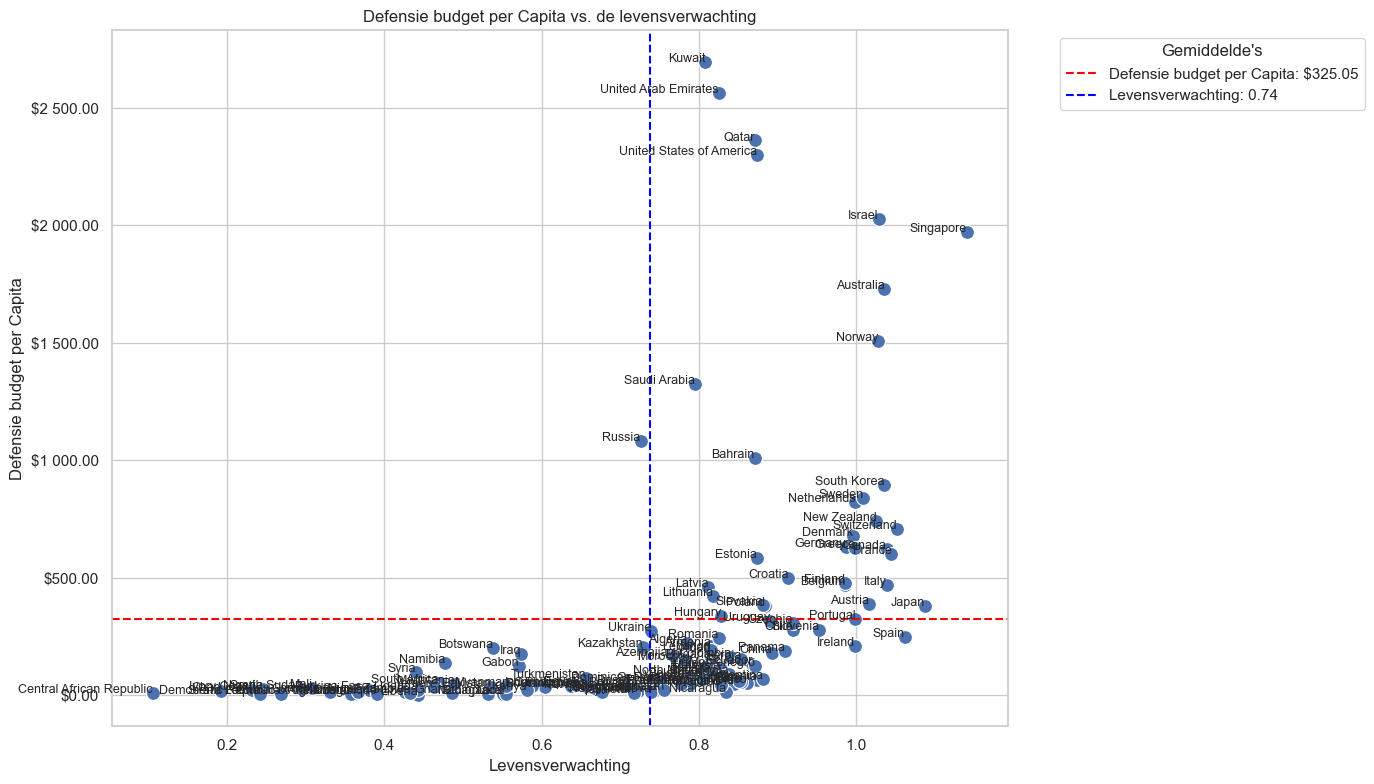

In [15]:
#we maken extra kolom met defensie per capita
result['Defense Budget per Capita'] = result['Defense Budget'] / result['Total Population']

avg_life_expectancy = result['Healthy life expectancy'].mean()
avg_defense_budget_per_capita = result['Defense Budget per Capita'].mean()

plt.figure(figsize=(14, 8))

sns.scatterplot(x='Healthy life expectancy', y='Defense Budget per Capita', data=result, s=100, legend=False)

# lijnen met gemiddelde
plt.axhline(avg_defense_budget_per_capita, color='red', linestyle='--', label=f'Defensie budget per Capita: ${avg_defense_budget_per_capita:,.2f}')
plt.axvline(avg_life_expectancy, color='blue', linestyle='--', label=f'Levensverwachting: {avg_life_expectancy:.2f}')

formatter = ticker.FuncFormatter(lambda x, pos: f'${x:,.2f}'.replace(',', ' '))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Levensverwachting')
plt.ylabel('Defensie budget per Capita')
plt.title('Defensie budget per Capita vs. de levensverwachting')

for index, row in result.iterrows():
    plt.text(row['Healthy life expectancy'], row['Defense Budget per Capita'], row['Country'], fontsize=9, ha='right')

plt.legend(title="Gemiddelde's" , bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Hier tonen we hoeveel landen uitgeven aan defensie per persoon in vergelijking met de (gezonde) levenverwachting.
<br><br>
Levensverwachting heeft weinig te maken met de uitgaven aan defensie behalve als je bij de top wilt horen dan heb je toch minstens $300 per persoon nodig.
<br><br>
In een eerdere plot zagen we dat de VS het veruit het meeste uitgeeft aan het leger ter wereld
maar er zijn landen die nog meer uitgeven per persoon.
  